In [2]:
import numpy as np
from os.path import dirname, join as pjoin
import scipy.io as sio
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


In [11]:
path= r"C:\Users\108652706\Documents\DOCUMENT_perso\ISI\MLA\trials\data\data_new"

In [12]:
mat_fname = pjoin(path, 'train_annotations.mat')

In [13]:
mat_contents = sio.loadmat(mat_fname)

In [14]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Jan 13 12:52:23 2016',
 '__version__': '1.0',
 '__globals__': [],
 'train_eyes': array([[array([[0.41272727, 0.21429687]]),
         array([[0.39648438, 0.14453125]]),
         array([[0.41786222, 0.19818182]]), ...,
         array([[0.77417999, 0.35749333]]),
         array([[0.62      , 0.22972973]]),
         array([[0.44254544, 0.12243636]])]], dtype=object),
 'train_gaze': array([[array([[0.51090909, 0.31132813]]),
         array([[0.14257812, 0.234375  ]]),
         array([[0.43428977, 0.17818182]]), ...,
         array([[0.61617999, 0.93615999]]),
         array([[0.476    , 0.5960961]]),
         array([[0.60254544, 0.42243636]])]], dtype=object),
 'train_bbox': array([[array([[0.29, 0.11, 0.68, 0.89]]),
         array([[0.24, 0.04, 0.68, 0.93]]),
         array([[0.2 , 0.15, 0.93, 0.68]]), ...,
         array([[0.69, 0.11, 0.31, 0.88]]),
         array([[0.44, 0.1 , 0.4 , 0.55]]),
         array([[0.19, 0

In [328]:
sorted(mat_contents.keys())

['__globals__',
 '__header__',
 '__version__',
 'train_bbox',
 'train_eyes',
 'train_gaze',
 'train_meta',
 'train_path']

In [171]:
#order of image
i=1

In [172]:
im_eye = mat_contents['train_eyes'][0][i]
im_path1= mat_contents['train_path'][i][0][0]
im_path = pjoin(path, im_path1)
im= cv2.imread(im_path)
image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
e= (im.shape[1], im.shape[0])*im_eye
im_gaze = mat_contents['train_gaze'][0][i]
g= (im.shape[1], im.shape[0])*im_gaze
im_box= mat_contents['train_bbox'][0][i]

In [355]:
im_box

array([[0.29, 0.2 , 0.36, 0.8 ]])

In [380]:
box= (im.shape[1], im.shape[0])*im_box[0,:2]

In [373]:
box

array([140.8 ,  78.12])

In [487]:
def box(im_box,im):
    width,height,_= im.shape
    box= (height, width,height/2, width/2)*im_box[0,:]
    box=box -np.array([0,0,box[0]/2,box[1]/2])
    #w=im_box[0,2]*width- box[1]
    #h=im_box[0,3]*height-box[0]
    return box[:2],box[2],box[3]
    

In [424]:
"""
def box(im_box,im):
    width,height,_= im.shape
    box= (height, width)*im_box[0,:2]
    x=im_box[0,3]*height- box[0]
    y=im_box[0,2]*width - box[1]
    return box,x,y
""""

In [488]:
rec = box(im_box,im)

In [489]:
rec

(array([ 57.6 , 152.32]), 41.60000000000001, 59.5)

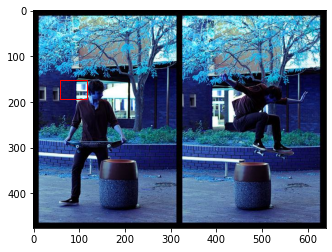

In [490]:


# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle(rec[0],rec[2],rec[1], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)


In [235]:
[x_initial y_initial w h]. (x_initial,y_initial) is the top left corner 
and (w,h) are width and height values. The values assume that images are size 1x1.
img_box

array([[array([[0.29, 0.11, 0.68, 0.89]]),
        array([[0.24, 0.04, 0.68, 0.93]]),
        array([[0.2 , 0.15, 0.93, 0.68]]), ...,
        array([[0.69, 0.11, 0.31, 0.88]]),
        array([[0.44, 0.1 , 0.4 , 0.55]]),
        array([[0.19, 0.03, 0.47, 0.92]])]], dtype=object)

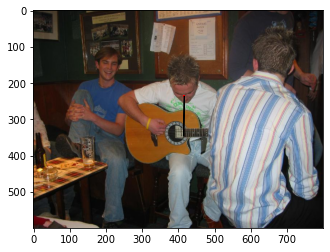

In [346]:

plt.imshow(image)
plt.scatter(e[0][0],e[0][1],color='red',marker='+',s=2)
#plt.scatter(g[0][0],e[0][1],color='blue',marker='*',s=4)
x=e[0][0]
y=e[0][1]
dx=g[0,0]- e[0,0]
dy=g[0,1]- e[0,1]

plt.arrow(x, y, dx, dy,length_includes_head=True, head_width=0.08, head_length=0.00002)

In [2]:
im=cv2.imread("lana_.jpg")

In [3]:
plt.imshow(im)

NameError: name 'plt' is not defined

In [177]:
import numpy as np
import cv2
def eye_head_extractor(img):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    face,eye,eyes=[],[],[]
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2, 
                                 minNeighbors=5, 
                                 minSize=(30, 30))#,maxSize=(50,50))

    for (x,y,w,h) in faces:
        face.append(img[y:y+h,x:x+w])
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        eye.append(roi_color[ey:ey+eh,ex:ex+ew])          
    return face,eye

In [178]:
face,eye= eye_head_extractor(im)

In [179]:
len(face),len(eye)

(0, 0)

In [169]:
face[0].shape#,face[1].shape

(57, 57, 3)

In [176]:
plt.imshow(face[0])

IndexError: list index out of range

In [18]:
img=im.copy()

In [144]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
#eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")#save the image(i) in the same directoryimg = cv2.imread("friends.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)

for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [24]:
faces

array([[274,  50,  61,  61],
       [349, 184,  57,  57]])

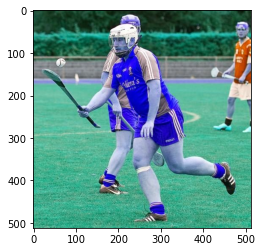

In [180]:
plt.imshow(im)